<a href="https://colab.research.google.com/github/PrathamMalhotra21/Email-Campaign-Effectiveness-Prediction/blob/main/Pratham_Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Email Campaign Effectiveness Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member - Pratham**

# **Project Summary -**

**Approach**

* Understanding the Problem Statment.
* Import libraries.
* Load the data.
* Data pre-processing, which involves inspection of both datasets and data cleaning.
* Exploratory data analysis, to find which factors affect sales and how they affect it.
* Feature engineering, to prepare data for modelling.
* Modelling data and comparing the models to find out most suitable one for classification.
* Conclusion.

**Exploratory Data Analysis**

* Customer Location doesnt affect the chance of email being ignore,read and acknowledge.
* Email should be short as it has more chance to get read,acknowledge.
* Email Campaign Type 3 is more succesful
* As the number of previous communication increases, the chances of the e-mail being read or acknowledged also increases.

**Supervise Machine learning algorithms and implementation :**

* Logistic regression

* Random Forest Classifier

* XG Boost Classifier

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project-Classification/data_email_campaign.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(68353, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

Customer_Location            11595
Total_Past_Communications     6825
Total_Links                   2201
Total_Images                  1677
Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Email_Campaign_Type              0
Time_Email_sent_Category         0
Word_Count                       0
Email_Status                     0
dtype: int64

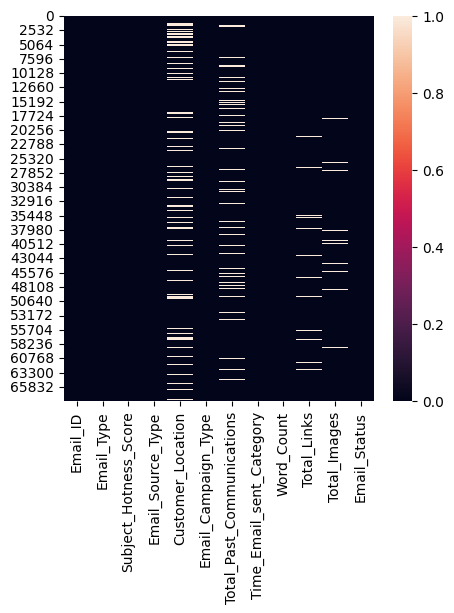

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.show()

### What did you know about your dataset?

* Dataset has total of 68353 observation and 12 features.
* Dataset is a mixture of integer, float and object data type.
* Dataset has all unique values i.e., there is no duplicate which means data is free from bias as duplicates can cause problems in downstream analyses, such as biasing results or making it difficult to accurately summarize the data.
* Features like customer location (11595 i.e., 16%), total past communication (6825 i.e., 10%), total link (2201 i.e., 3%), total images (1677 i.e., 2%) has null values. 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Email_Type,68353.0,1.285094,0.451462,1.0,1.0,1.0,2.0,2.0
Subject_Hotness_Score,68353.0,1.095481,0.997578,0.0,0.2,0.8,1.8,5.0
Email_Source_Type,68353.0,1.456513,0.498109,1.0,1.0,1.0,2.0,2.0
Email_Campaign_Type,68353.0,2.272234,0.468680,1.0,2.0,2.0,3.0,3.0
Total_Past_Communications,61528.0,28.933250,12.536518,0.0,20.0,28.0,38.0,67.0
Time_Email_sent_Category,68353.0,1.999298,0.631103,1.0,2.0,2.0,2.0,3.0
Word_Count,68353.0,699.931751,271.719440,40.0,521.0,694.0,880.0,1316.0
Total_Links,66152.0,10.429526,6.383270,1.0,6.0,9.0,14.0,49.0
Total_Images,66676.0,3.550678,5.596983,0.0,0.0,0.0,5.0,45.0
Email_Status,68353.0,0.230934,0.497032,0.0,0.0,0.0,0.0,2.0


### Variables Description 

* **Email_Id** - Email id of customer
* **Email_Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates and notices like emails regarding business
* **Subject_Hotness_Score** - It is the email's subject's score on the basis of how good and effective the content is
* **Email_Source_Type** - It represents the source of the email like sales and marketing or important admin mails related to the product
* **Email_Campaign_Type** - The campaign type of the email.
* **Customer_Location** - Contains demographical data of the customer, the location where the customer resides.
* **Total_Past_Communications** - This columns contains the total previous mails from the same source, the number of communications had.
* **Time_Email_sent_Category** - It has three categories 1,2 and 3, Time of the day when the email was sent, either morning, evening and night time
* **Word_Count** - Total count of word in each email
* **Total_links** - Total number of links in the email
* **Total_Images** - Total Number of images in the email
* **Email_Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns:
  print("No. of unique values in '{}' is {}.".format(i, df[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Drop Email Id
df.drop("Email_ID",inplace=True,axis=1)

In [ ]:
# Getting outlier columns
null_col = []
for i in df.columns:
  if df[i].isnull().sum() != 0:
    null_col.append(i)   

In [ ]:
null_col

['Customer_Location',
 'Total_Past_Communications',
 'Total_Links',
 'Total_Images']

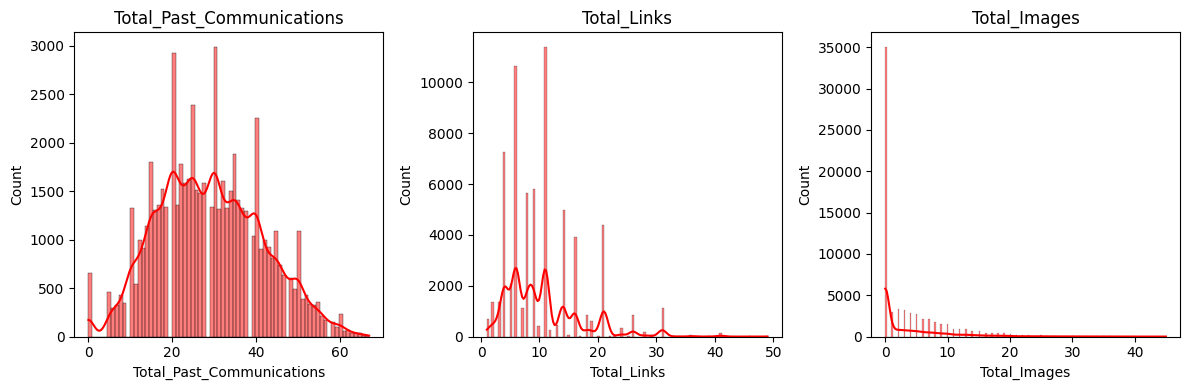

In [ ]:
# Check distribution 
plt.figure(figsize=(12,4))
null = [j for j in null_col if j not in "Customer_Location"]
for i,col in enumerate(null):
  plt.subplot(1,3,i+1)
  sns.histplot(df[col],color='red',kde=True)
  plt.title(col)
plt.tight_layout()
plt.show()  

In [ ]:
# Dealing with missing value in categorail variable 
df["Customer_Location"].fillna(df["Customer_Location"].mode()[0],inplace=True)

In [ ]:
# Dealing with missing value in numerical value
df["Total_Past_Communications"].fillna(df["Total_Past_Communications"].mean(),inplace=True)
df["Total_Links"].fillna(df["Total_Links"].median(),inplace=True)
df["Total_Images"].fillna(df["Total_Images"].median(),inplace=True)

In [ ]:
#creating list of numerical and categorical columns
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>7:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(categorical_columns)

['Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status', 'Customer_Location', 'Email_Type', 'Email_Source_Type']


In [ ]:
print(numerical_columns)

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']


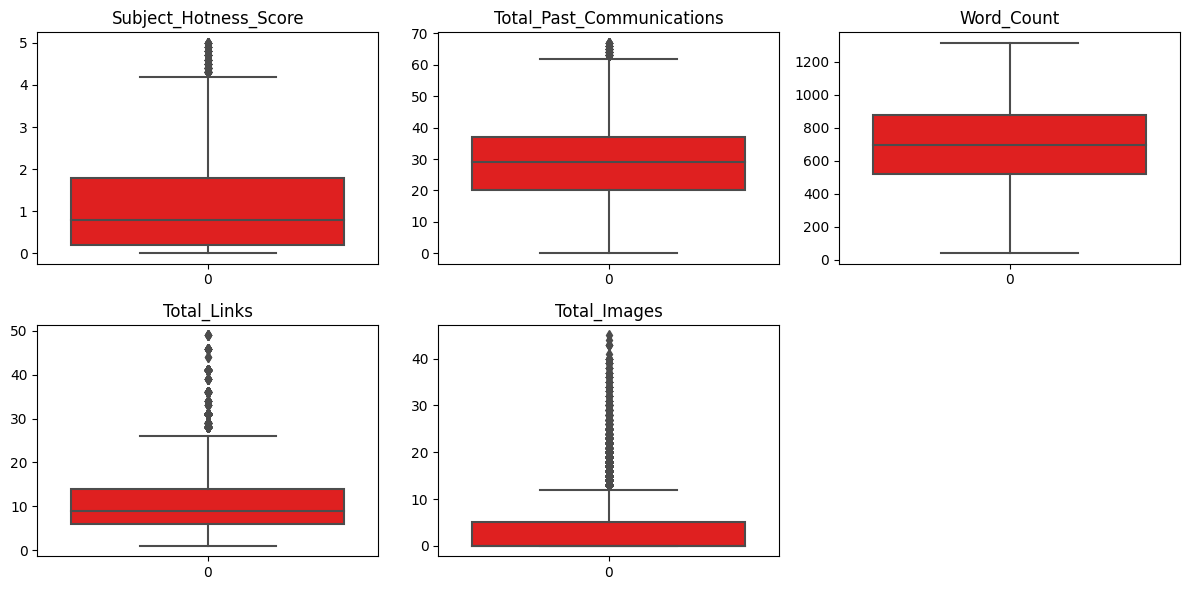

In [ ]:
# Outliers
plt.figure(figsize=(12,6))
for i,col in enumerate(numerical_columns):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col],color='red')
  plt.title(col)
plt.tight_layout()
plt.show()   

In [ ]:
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)-1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+1.5*IQR
  return upper_bridge,lower_bridge

In [ ]:
# deal with putliers
for feature in [i for i in numerical_columns if i not in "Word_Count"]:
  df.loc[df[feature]<= outlier_treatment_skew(df=df,feature=feature)[1], feature]=outlier_treatment_skew(df=df,feature=feature)[1]
  df.loc[df[feature]>= outlier_treatment_skew(df=df,feature=feature)[0], feature]=outlier_treatment_skew(df=df,feature=feature)[0]

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Categorical Variable and Target variable

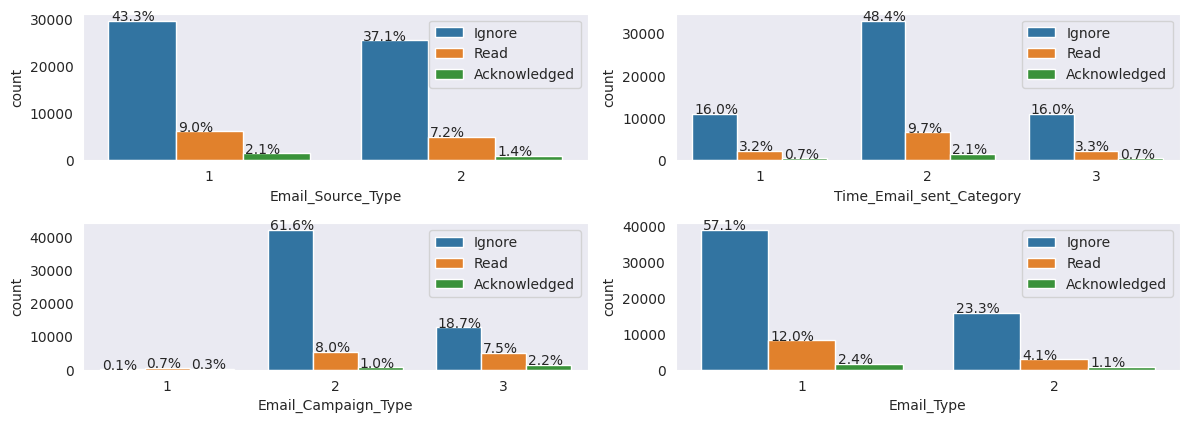

In [ ]:
# Chart - 1 visualization code
sns.set_style("dark")
plt.figure(figsize=(12,6))
for i,col in enumerate([j for j in categorical_columns if j not in ["Email_Status","Customer_Location"]]):
  plt.subplot(3,2,i+1)
  ax = sns.countplot(x=df[col],hue=df["Email_Status"])
  plt.legend(labels=["Ignore","Read","Acknowledged"])
  for p in ax.patches:
    ax.annotate(f'{p.get_height()/len(df)*100:.1f}%', (p.get_x()+0.01, p.get_height()+5))
plt.tight_layout()  
plt.show()  

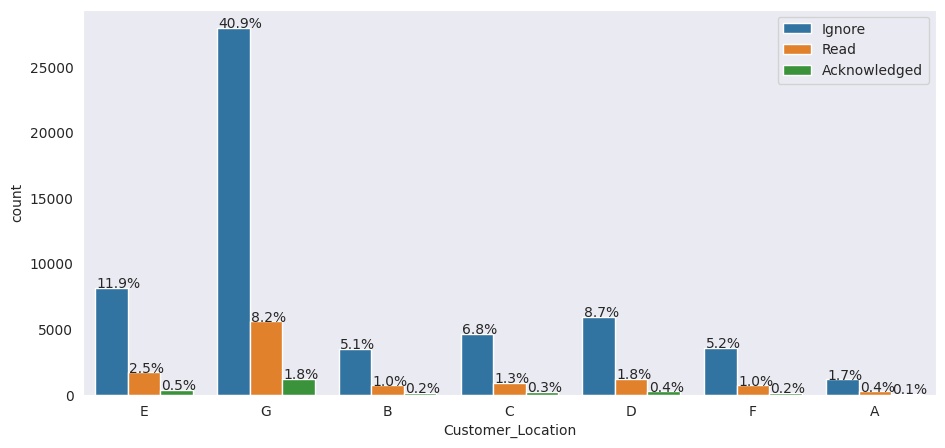

In [ ]:
plt.figure(figsize=(11,5))
ax = sns.countplot(x=df["Customer_Location"],hue=df["Email_Status"])
plt.legend(labels=["Ignore","Read","Acknowledged"])
for p in ax.patches:
  ax.annotate(f'{p.get_height()/len(df)*100:.1f}%', (p.get_x()+0.01, p.get_height()+5))
plt.show()  

##### 1. Why did you pick the specific chart?

We are using Countplot to check the relationship between categorical variable and target variable

##### 2. What is/are the insight(s) found from the chart?

* Email_Soruce_Type_1 has most number of reject emails but same time it give more acknowledge email. However there is  slightly differnece between Email_Soruce_Type_1 and Email_Soruce_Type_2.

* So most prefered location is G followed by location E.

* In Email_Campaign_type there is a twist is that type 3 has less rejection and high acknowledgement of Email.

* In Time Sent category the type 2 which is "Evening has more acknowledgment of email.

* Also. We notice that Email_Status is high imbalnced. Because There is high chance of email being ignore instead of read or acknowlegment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain insight to help creating a positive business impact.

#### Chart - Email Type

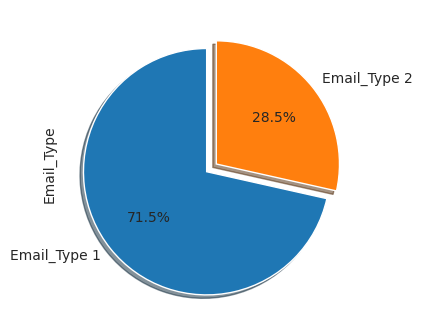

In [ ]:
# Chart - 2 visualization code
df['Email_Type'].value_counts().plot(kind='pie',figsize=(4,4),autopct="%1.1f%%",startangle=90,
                                     shadow=True,labels=['Email_Type 1','Email_Type 2'],explode=[0.1,0]);

##### 1. Why did you pick the specific chart?

We use pie chart to plot Email Type.

##### 2. What is/are the insight(s) found from the chart?

* Share of Email_Type 1 is 71.5, While share of Email_Type 2 is 28.5.
* Also. 80% of the email is ignored by the user while 20% of email is read.
* Only 3.5% of email is acknowledged by the user

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, This will help us to create postive businness impact.

#### Chart - Numerical Variable and Target variable

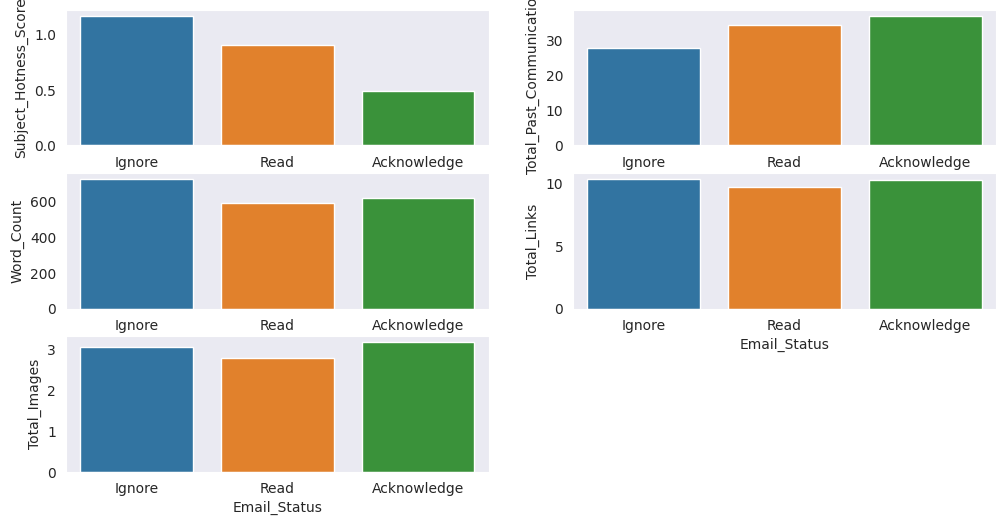

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
for i, col in enumerate(numerical_columns):
  email = df.groupby("Email_Status")[col].mean().reset_index().round(2)
  email["Email_Status"] = email["Email_Status"].replace({0:"Ignore",1:"Read",2:"Acknowledge"})
  plt.subplot(3,2,i+1)
  sns.barplot(x="Email_Status", y=col, data=email)
plt.show()

##### 1. Why did you pick the specific chart?

We use barplot to check the relationship between numercial variable and target variable

##### 2. What is/are the insight(s) found from the chart?

* As Subject Hotness Score increase the cahnce of email being igbored also increase while less score gives more acknowledge.
* In Communnication large number of ignored emails, shows less number of communication than that of acknowledged emails.
* when it comes to the reamning numerical variables we cant see any relationship.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It will help us to make the email more impactful.

#### Chart - Customer Location

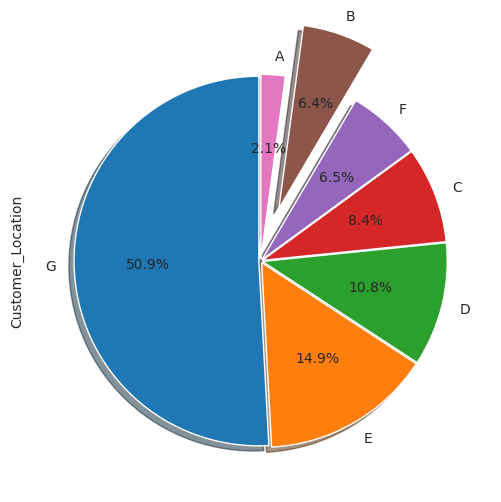

In [ ]:
# Chart - 5 visualization code
df['Customer_Location'].value_counts().plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,
                                            shadow=True,labels=['G','E', 'D','C','F','B','A'],explode=[0.01,0.01,0.01,0.01,0.01,0.3,0.01])
plt.show()

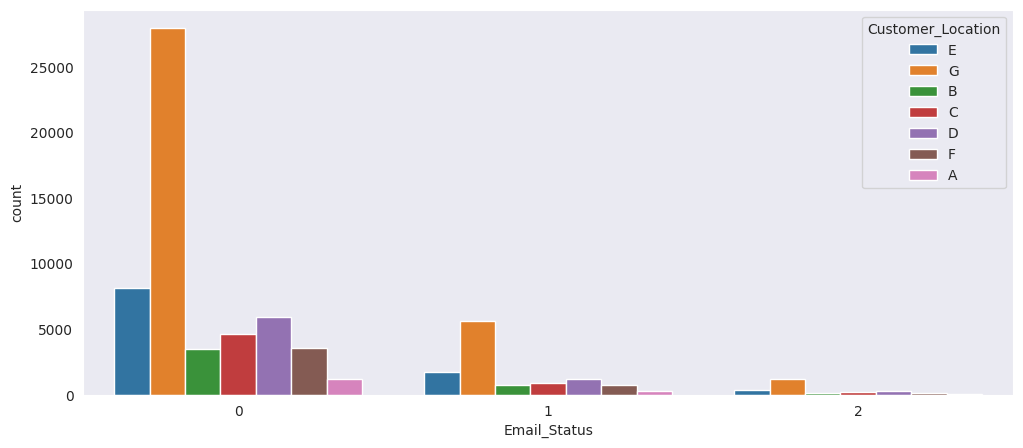

In [ ]:
plt.figure(figsize = (12,5))
sns.countplot(x=df['Email_Status'], hue=df['Customer_Location'])
plt.show()

<Figure size 1400x500 with 0 Axes>

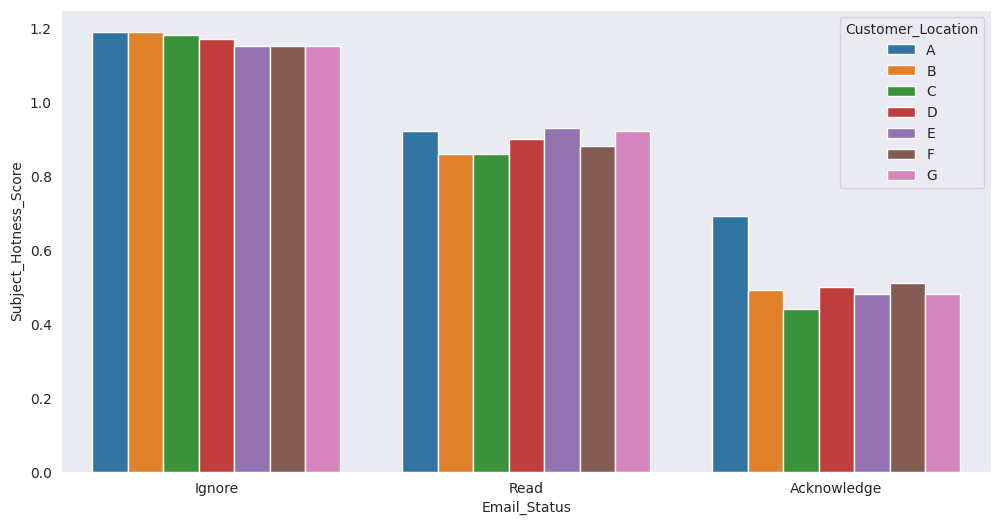

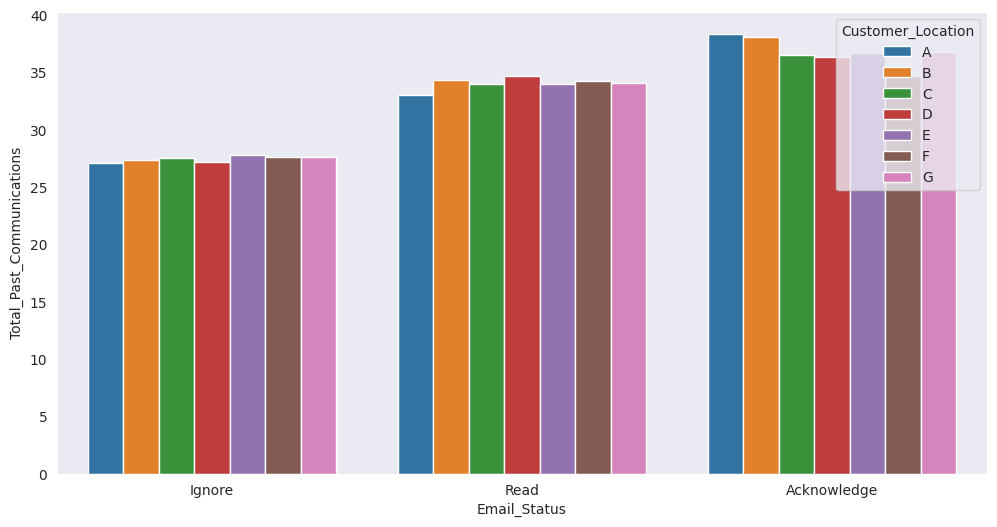

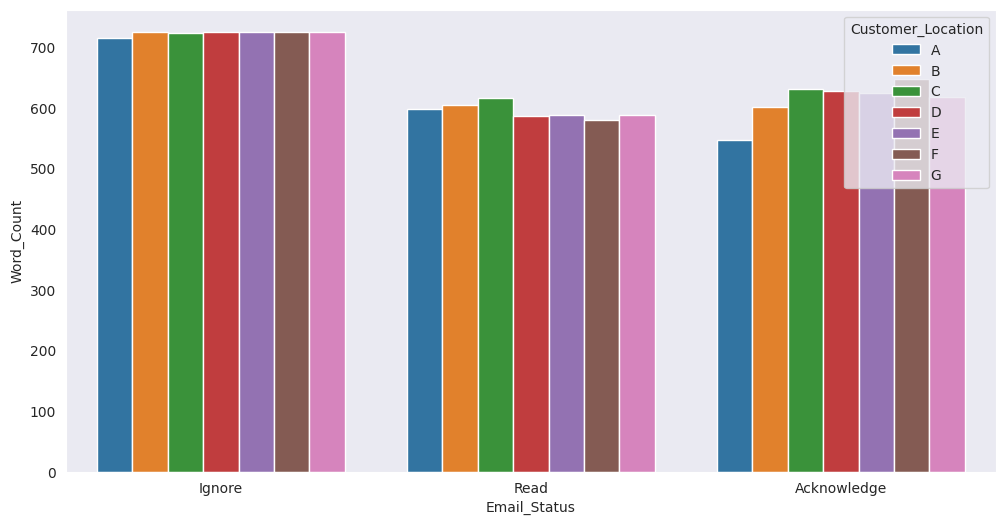

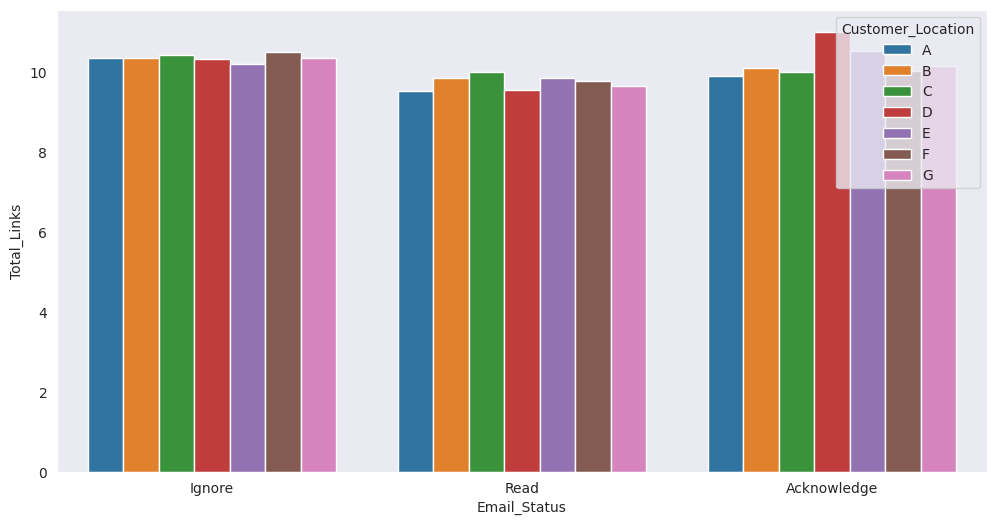

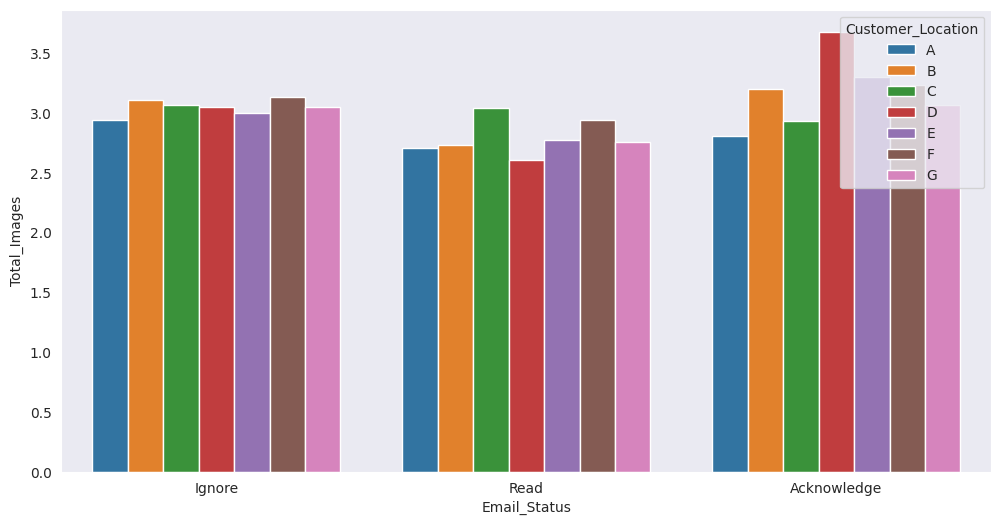

In [ ]:
plt.figure(figsize=(14,5))
for i, col in enumerate(numerical_columns):
  plt.figure(figsize=(12,6))
  email = df.groupby(["Customer_Location","Email_Status"])[col].mean().reset_index().round(2)
  email["Email_Status"] = email["Email_Status"].replace({0:"Ignore",1:"Read",2:"Acknowledge"})
  sns.barplot(x="Email_Status", y=col, data=email,hue="Customer_Location")
plt.show()

##### 1. Why did you pick the specific chart?

We are using bar chart to check relationship between Customer location and other variable

##### 2. What is/are the insight(s) found from the chart?

* From the above chart it seems that 50% email sent to location G but when it comes to communcation A has highest acknowledgement and Share of location A is 2.1%. So more email should sent to location A.
* Also we need to reduce the share of location G has the contribution of other Location shouls also increase to tap the potensial in other location.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It will help us to tap the hidden potential in some loation

#### Chart - Email Time Sent Category

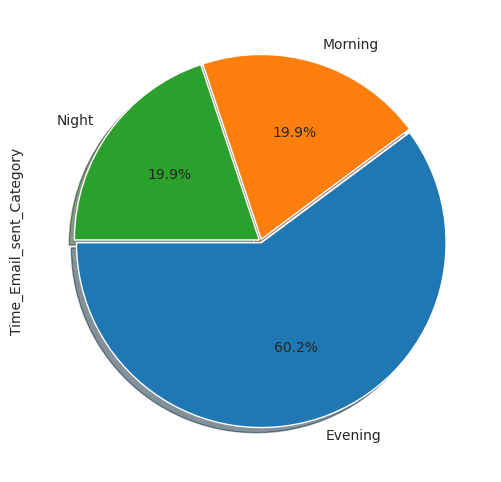

In [ ]:
# Chart - 6 visualization code
df['Time_Email_sent_Category'].value_counts().plot(kind='pie',figsize=(10,6),autopct="%1.1f%%",startangle=180,
                                                   shadow=True,labels=['Evening','Morning', 'Night'],explode=[0.01,0.01,0.01])
plt.show()                       

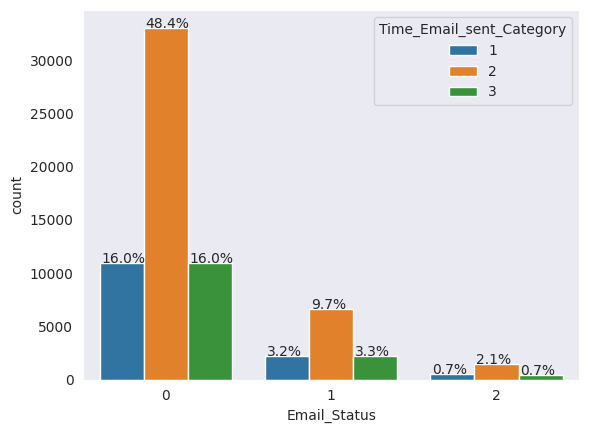

In [ ]:
ax = sns.countplot(x=df['Email_Status'], hue=df['Time_Email_sent_Category'])
for p in ax.patches:
  ax.annotate(f'{p.get_height()/len(df)*100:.1f}%', (p.get_x()+0.01, p.get_height()+5))

##### 1. Why did you pick the specific chart?

We are using barplot to plot time email sent and email_status

##### 2. What is/are the insight(s) found from the chart?

Email sent in morning and night has equal percentage, overal email sent during these time are more acknowledged.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, It will help us to decide time to sent email to the target customer

#### Chart - 14 - Correlation Heatmap

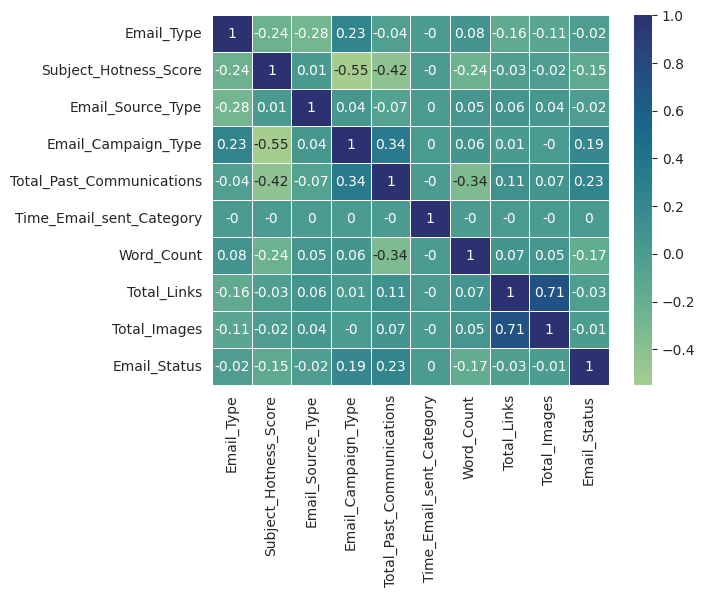

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr().round(2), annot=True,linewidth=.5,cmap="crest")
plt.show()

##### 1. Why did you pick the specific chart?

We are checking corr heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above corr heatmap we found that Toatl_link anf Total_Images have corr.

#### Chart - 15 - Pair Plot 

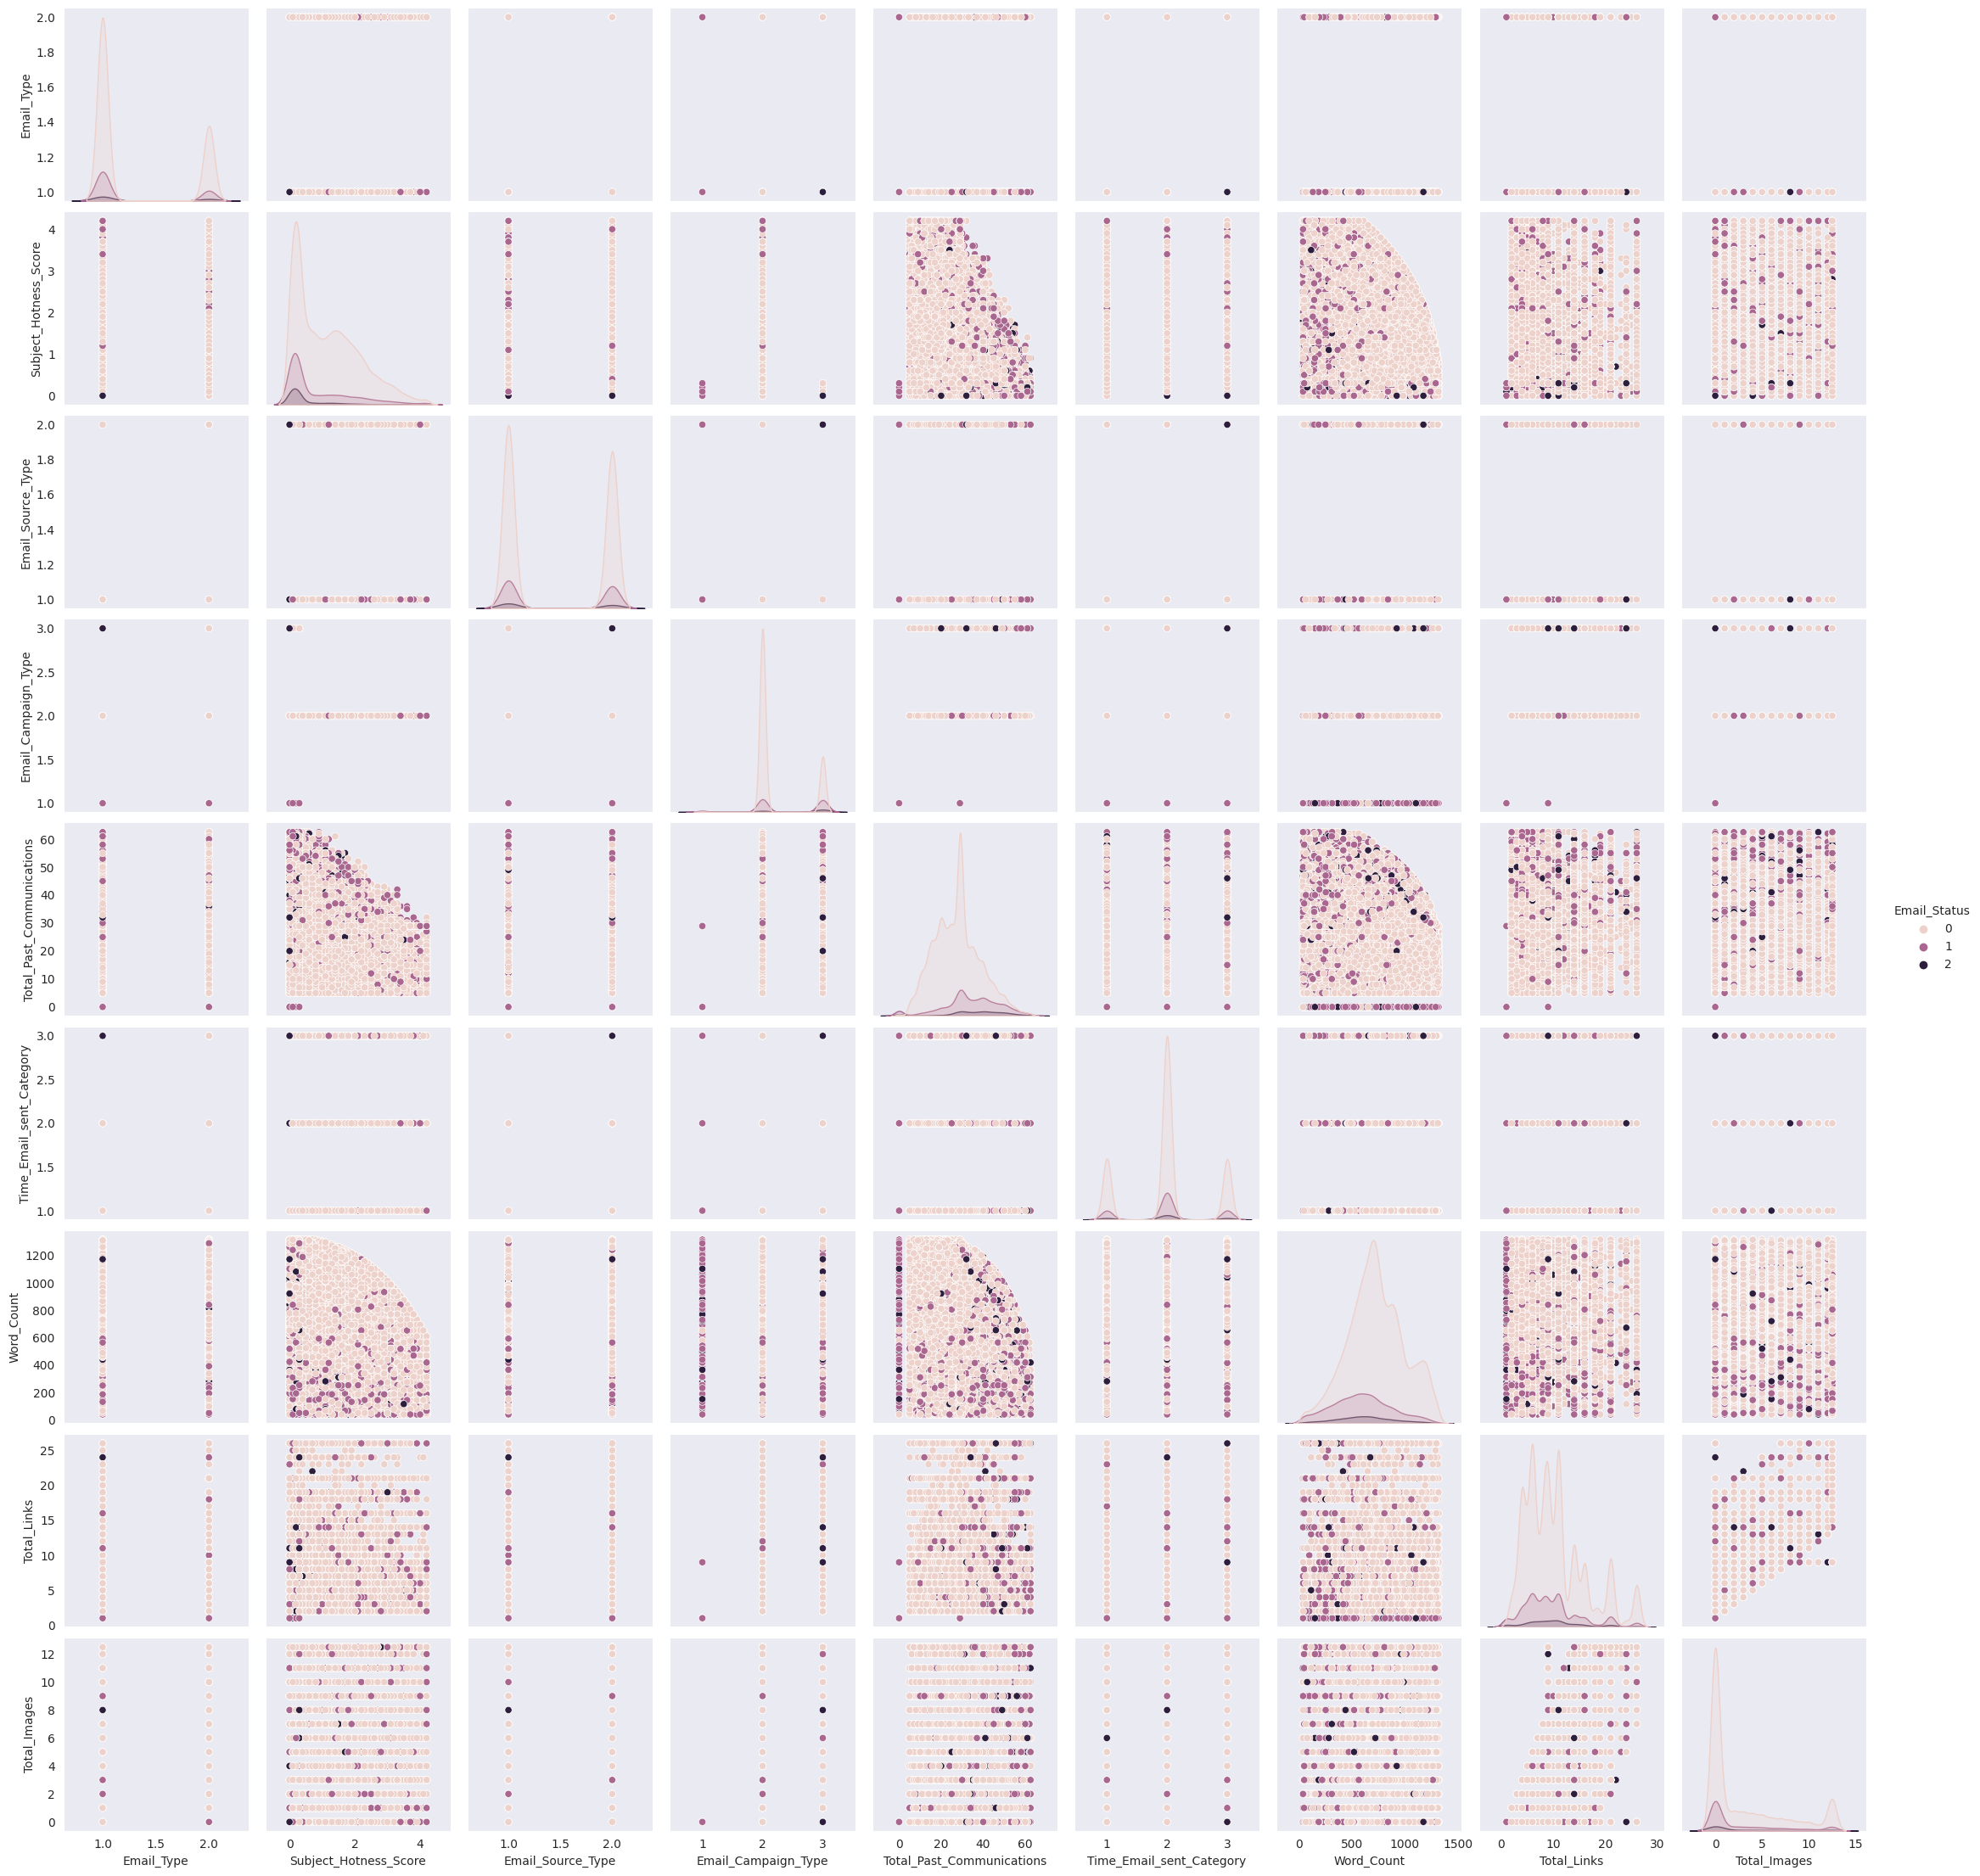

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, hue="Email_Status")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0


In [ ]:
# Encode your categorical columns
freq = df["Customer_Location"].value_counts(normalize=True)
df["Customer_Location"] = df["Customer_Location"].map(freq)

df.head(1)

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,1,2.2,2,0.149123,2,33.0,1,440,8.0,0.0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

We are using frequency Encoding on Customer Location.This method can be useful where one-hot encoding would create too many columns. By replacing each category with its frequency, encoding can help capture the importance of rare categories that may be missed by one-hot encoding.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df['Total_Img_links'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1)

#### 2. Feature Selection

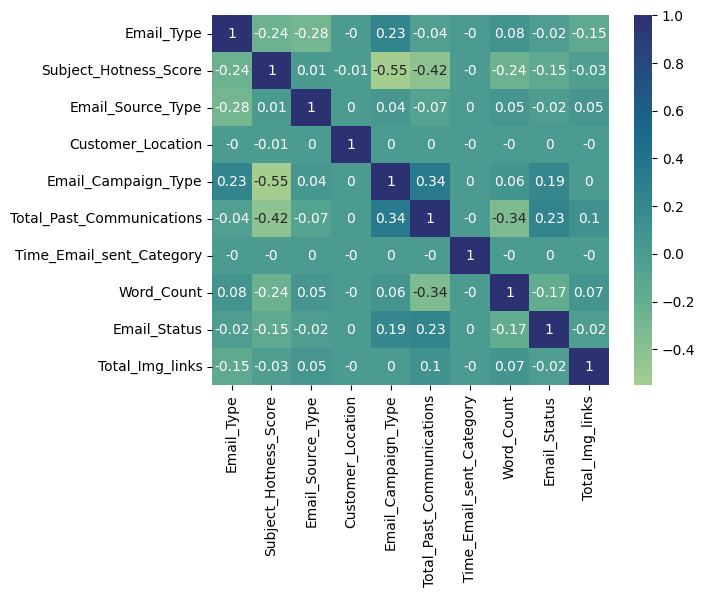

In [ ]:
# Select your features wisely to avoid overfitting
sns.heatmap(df.corr().round(2),annot=True,cmap='crest')
plt.show()

##### Which all features you found important and why?

In [ ]:
def randomforest_embedded(x,y):
  # Create the random forest eith hyperparameters
  model= RandomForestClassifier(n_estimators=550)
  # Fit the mmodel
  model.fit(x,y)
  # get the importance of thr resulting features
  importances= model.feature_importances_
  # Create a data frame for visualization
  final_df= pd.DataFrame({"Features": pd.DataFrame(x).columns, "Importances": importances})
  final_df.set_index('Importances')
  # Sort in ascending order to better visualization
  final_df= final_df.sort_values('Importances')
  # Plot the feature importances in bars
  sns.barplot(y="Features", x = "Importances",data=final_df)
  plt.show()
  # return final_df

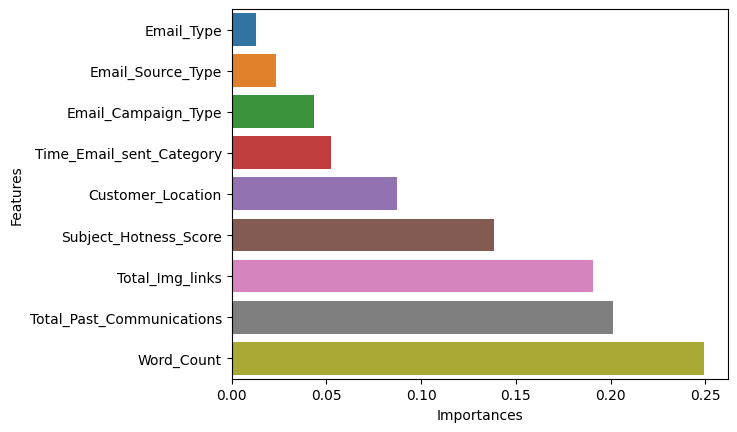

In [ ]:
randomforest_embedded(x=df.drop(["Email_Status"],axis=1),y=df["Email_Status"])

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
numerical_columns=[]
for col in df.columns:
  if df[col].nunique()>7:
    numerical_columns.append(col)
categorical_columns=list(set(df.columns)-set(numerical_columns))

In [ ]:
print(numerical_columns)

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Img_links']


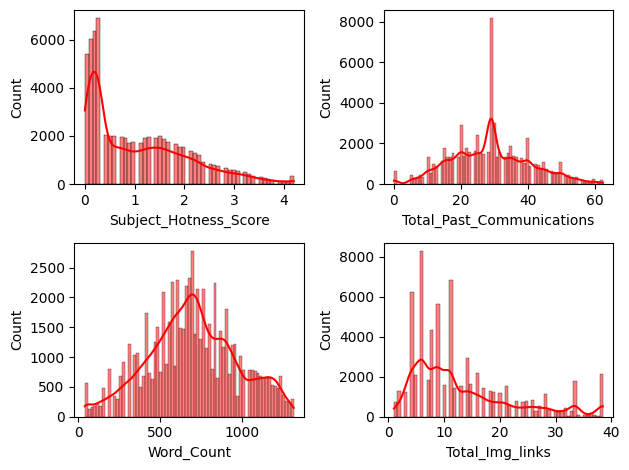

In [ ]:
# Checking the distribution 
for i,col in enumerate(numerical_columns):
  plt.subplot(2,2,i+1)
  sns.histplot(df[col],kde=True,color='red')
plt.tight_layout()
plt.show()  

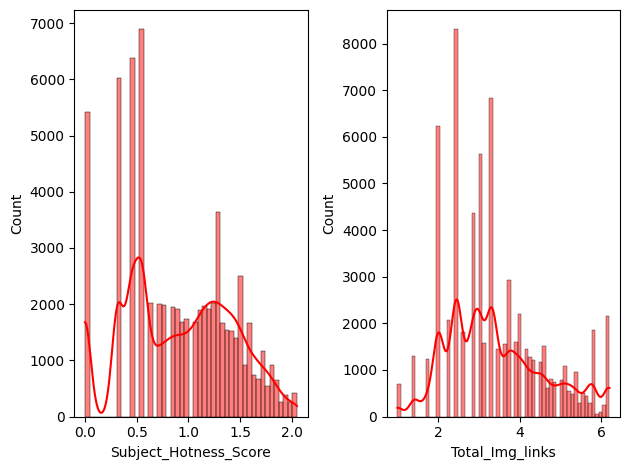

In [ ]:
scal_fea = ["Subject_Hotness_Score","Total_Img_links"]
for i,col in enumerate(scal_fea):
  plt.subplot(1,2,i+1)
  sns.histplot(np.sqrt(df[col]),kde=True,color='red')
plt.tight_layout()
plt.show()  

In [ ]:
# Applying np.sqrt to features
for col in scal_fea:
  df[col]=np.sqrt(df[col])

### 6. Data Scaling

In [ ]:
print(numerical_columns)

['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Img_links']


In [ ]:
# Scaling your data
for col in numerical_columns:
  df[col] = MinMaxScaler().fit_transform(df[col].values.reshape(-1, 1))

##### Which method have you used to scale you data and why?

I used Min Max scaler method to normalize the range of independent variables or features of data

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = df.drop(["Email_Status"],axis=1)
Y = df["Email_Status"]

# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Shape of train test split
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (54682, 9)
Number transactions y_train dataset:  (54682,)
Number transactions X_test dataset:  (13671, 9)
Number transactions y_test dataset:  (13671,)


##### What data splitting ratio have you used and why? 

We have made the use of 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, Data is imbalanced

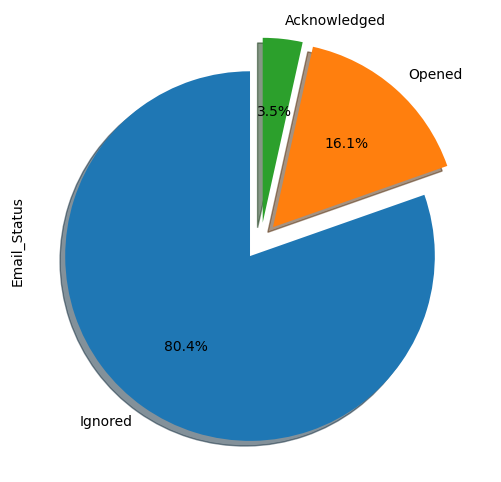

In [ ]:
# Handling Imbalanced Dataset (If needed)
df['Email_Status'].value_counts().plot(kind='pie',figsize=(15,6), autopct="%1.1f%%",startangle=90,shadow=True,
                                       labels=['Ignored','Opened','Acknowledged'],explode=[0.1,0.1,0.1])
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) to balance the data.

In [ ]:
# Handling imbalanced data
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (131817, 9)
Number transactions y_train dataset:  (131817,)
Number transactions X_test dataset:  (13671, 9)
Number transactions y_test dataset:  (13671,)


## ***6. ML Model Implementation***

### ML Model - Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr = LogisticRegression(fit_intercept=True,
            class_weight='balanced',multi_class='multinomial')
# Fit the Algorithm
lr.fit(X_train, y_train)

# Checking the coefficients
print("Coefficients is \n",lr.coef_,"\n")
# Checking the intercept value
print("Intercept is \n",lr.intercept_,"\n")

# Get the predicted probabilities
train_probability = lr.predict_proba(X_train)
test_probability = lr.predict_proba(X_test)

# Get the predicted classes
y_pred_train = lr.predict(X_train)
y_pred = lr.predict(X_test)

Coefficients is 
 [[ 0.27717926  0.41792562  0.10082879  0.0611764  -0.15904946 -0.16736269
   0.05666676  0.35920036  0.06714912]
 [-0.1191701   0.09373618  0.07476003 -0.03742439  0.21971184  0.0497079
   0.02359957 -0.20145054 -0.10354001]
 [-0.15800916 -0.5116618  -0.17558882 -0.02375201 -0.06066238  0.11765479
  -0.08026632 -0.15774982  0.0363909 ]] 

Intercept is 
 [-0.06816901 -0.46330577  0.53147477] 



In [ ]:
# Checking the coefficients
print("Coefficients is ",lr.coef_,"\n")
# Checking the intercept value
print("Intercept is ",lr.intercept_)

Coefficients is  [[ 0.27717926  0.41792562  0.10082879  0.0611764  -0.15904946 -0.16736269
   0.05666676  0.35920036  0.06714912]
 [-0.1191701   0.09373618  0.07476003 -0.03742439  0.21971184  0.0497079
   0.02359957 -0.20145054 -0.10354001]
 [-0.15800916 -0.5116618  -0.17558882 -0.02375201 -0.06066238  0.11765479
  -0.08026632 -0.15774982  0.0363909 ]] 

Intercept is  [-0.06816901 -0.46330577  0.53147477]


In [ ]:
# Training 
print(metrics.classification_report(y_pred_train, y_train))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_train = roc_auc_score(y_train, train_probability,multi_class='ovr',average='weighted')
print(f"roc_auc_score_train : {roc_auc_score_train}")

              precision    recall  f1-score   support

           0       0.62      0.54      0.58     50176
           1       0.28      0.44      0.34     27736
           2       0.60      0.49      0.54     53905

    accuracy                           0.50    131817
   macro avg       0.50      0.49      0.49    131817
weighted avg       0.54      0.50      0.51    131817

 
roc_auc_score_train : 0.6814533799356756


In [ ]:
# Testing 
print(metrics.classification_report(y_pred, y_test))
print(" ")

#printing roc auc score - roc curve work with probability for multiclass
roc_auc_score_test = roc_auc_score(y_test, test_probability,multi_class='ovr',average='weighted')
print(f"roc_auc_score_test : {roc_auc_score_test}")

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      7698
           1       0.27      0.25      0.26      2414
           2       0.60      0.07      0.13      3559

    accuracy                           0.57     13671
   macro avg       0.50      0.41      0.38     13671
weighted avg       0.56      0.57      0.49     13671

 
roc_auc_score_test : 0.6983170751125201


### ML Model - Random Forest Classifer

In [ ]:
# Random Forest
from sklearn.model_selection import GridSearchCV
rf_model = RandomForestClassifier()

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,param_grid = param_dict,cv = 5, verbose=2, scoring='f1')

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# best parameter
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

# Making predictions on train and test data
y_pred_train_rf = rf_grid.predict(X_train)
y_pred_rf = rf_grid.predict(X_test)

# Get the predicted probabilities
train_probability_rf = rf_grid.predict_proba(X_train)
test_probability_rf = rf_grid.predict_proba(X_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   5.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   3.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   7.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   6.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   4.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   7.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   9.3s
[CV] END max_depth=4, min_sam

In [ ]:
# Train
print(metrics.classification_report(y_pred_train_rf, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability_rf, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.76      0.60      0.67     55577
           1       0.24      0.45      0.31     23232
           2       0.66      0.55      0.60     53008

    accuracy                           0.55    131817
   macro avg       0.55      0.53      0.53    131817
weighted avg       0.63      0.55      0.58    131817

 
roc_auc_score
0.7484948290770799


In [ ]:
# Test
print(metrics.classification_report(y_pred_rf, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability_rf, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      9265
           1       0.24      0.27      0.25      1998
           2       0.61      0.11      0.19      2408

    accuracy                           0.67     13671
   macro avg       0.53      0.43      0.42     13671
weighted avg       0.66      0.67      0.63     13671

 
roc_auc_score
0.7522920782974962


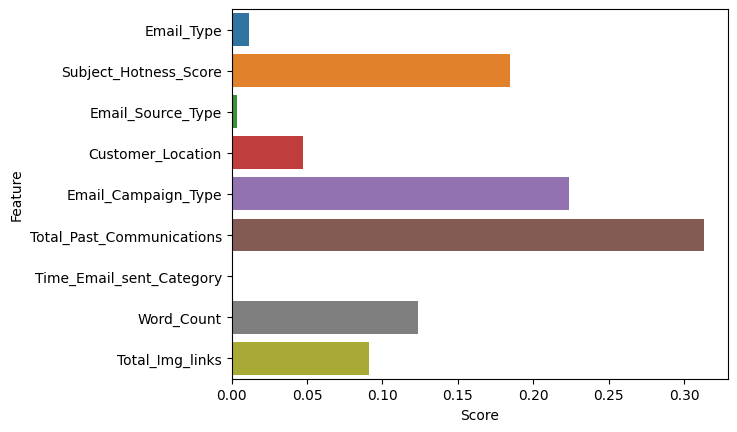

In [ ]:
# Feature Importance
rf_imp = pd.DataFrame([X.columns,rf_grid.best_estimator_.feature_importances_]).transpose()
rf_imp.rename(columns={0:"Feature",1:"Score"},inplace=True)
sns.barplot(y=rf_imp["Feature"],x=rf_imp["Score"])
plt.show()

### ML Model - XGBoost

In [ ]:
# ML Model - 3 Implementation
from sklearn.model_selection import GridSearchCV

# Hyperparameter Grid
param_dict = {#'n_estimators' : [50,80,100],
              #'max_depth' : [4,6,8],
              "objective": ["multi:softmax"],
              "num_class": [len(set(y_train))],
              "eval_metric": ["mlogloss"],
              'learning_rate': [0.01,0.02,0.05,0.07,0.1],
              #'min_child_weight': [1,3,5],
              #'min_samples_split' : [50,100,150],
              #'min_samples_leaf' : [40,50]
              }

# Create an instance of the XGBClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)

# Best parameter
print("=="*25)
print("\n Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

# Predict on the model
y_pred_train_xg = xg_grid1.predict(X_train)
y_pred_xg = xg_grid1.predict(X_test)

# Predict on the model
train_probability_xg = xg_grid1.predict_proba(X_train)
test_probability_xg = xg_grid1.predict_proba(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END eval_metric=mlogloss, learning_rate=0.01, num_class=3, objective=multi:softmax; total time=  44.5s
[CV] END eval_metric=mlogloss, learning_rate=0.01, num_class=3, objective=multi:softmax; total time=  44.7s
[CV] END eval_metric=mlogloss, learning_rate=0.01, num_class=3, objective=multi:softmax; total time=  42.2s
[CV] END eval_metric=mlogloss, learning_rate=0.01, num_class=3, objective=multi:softmax; total time=  42.0s
[CV] END eval_metric=mlogloss, learning_rate=0.01, num_class=3, objective=multi:softmax; total time=  42.2s
[CV] END eval_metric=mlogloss, learning_rate=0.02, num_class=3, objective=multi:softmax; total time=  43.8s
[CV] END eval_metric=mlogloss, learning_rate=0.02, num_class=3, objective=multi:softmax; total time=  42.1s
[CV] END eval_metric=mlogloss, learning_rate=0.02, num_class=3, objective=multi:softmax; total time=  41.9s
[CV] END eval_metric=mlogloss, learning_rate=0.02, num_class=3, objective=mu

In [ ]:
# Train
print(metrics.classification_report(y_pred_train_xg, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_probability_xg, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74     49417
           1       0.36      0.55      0.43     28448
           2       0.75      0.61      0.67     53952

    accuracy                           0.63    131817
   macro avg       0.63      0.62      0.62    131817
weighted avg       0.68      0.63      0.65    131817

 
roc_auc_score
0.8088348366798573


In [ ]:
# Test 
print(metrics.classification_report(y_pred_xg, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_probability_xg, multi_class = 'ovr'))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      9678
           1       0.33      0.30      0.32      2434
           2       0.40      0.11      0.17      1559

    accuracy                           0.70     13671
   macro avg       0.50      0.43      0.44     13671
weighted avg       0.66      0.70      0.67     13671

 
roc_auc_score
0.7529176375124624


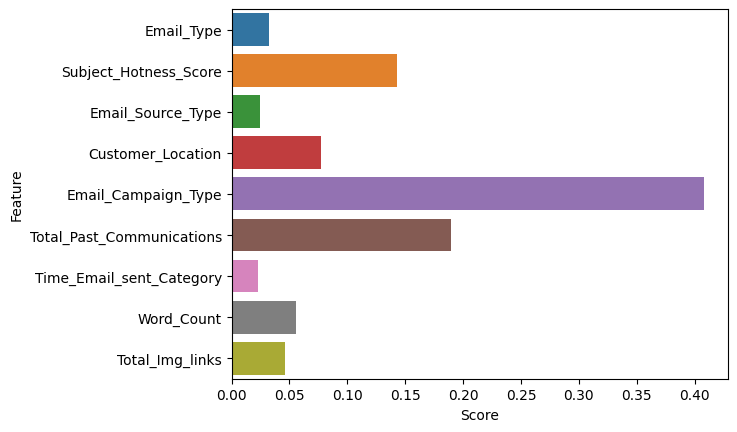

In [ ]:
# Feature Importances
xgb_imp = pd.DataFrame([X.columns,xg_grid1.best_estimator_.feature_importances_]).transpose()
xgb_imp.rename(columns={0:"Feature",1:"Score"},inplace=True)
sns.barplot(y=xgb_imp["Feature"],x=xgb_imp["Score"])
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics that would be considered for a positive business impact of an email campaign effectiveness in a classification model are **precision, recall** which combine to provide F1 score.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Random Forest With Hypertuned**

---

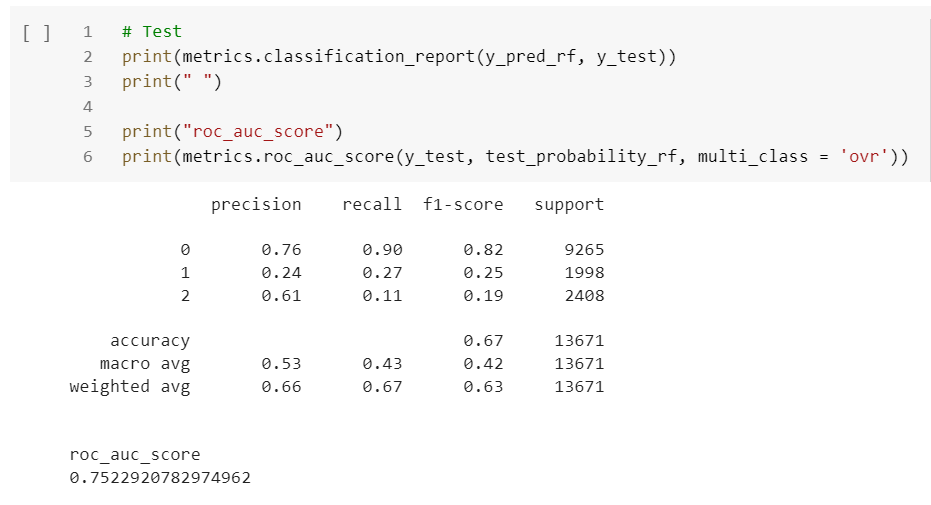

---

**XgBoost Classifier With Hypertuned**

---

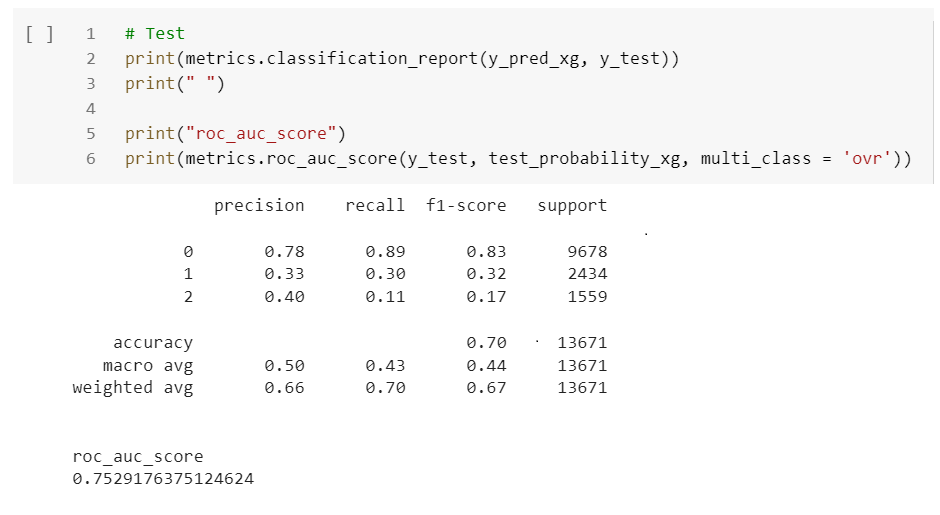

From the above snap shot, we can clearly see that for XGBoost has a improved score of f1_score over random forest. the accuracy and roc auc score is also improved for xg boost. The recall, precision and f1_score it's low and even in average scores of precision and f1_score is low. In case of xgboost it's higher than that of random forest. Plus 

So, I have chosen XGBoost as the final prediction model which should be deployed for real user interaction.

# **Conclusion**

From EDA

* In the Email Campaign Type feature,Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged. Also the share of campaign type 1 has to be increased.

* In Time email sent category the email sent on eveing(type 2) has more chance to read,acknowledged.

* In the customer location feature we found that Location G has highest share but also has highest chance of email being ignored. However Location A share has to be increassed.

* The more the words in an email, the more it has a tendency it has to get ignored. Too lengthy emails are getting ignored.

* More images were there in ignored emails.

* In total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

---

In ML Model

* I I have implemented 3 classification models Logistic Regression,Random Forest, XG Boost.

* Random Forest and Xgboost perform well. Howevwer Xgboost give better performance than other ml model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***